# Datatypes in a dataset 
columns ko variable bolte hai 
NUmerical variables - numbers
1. discrete - jo bar bar repeat kare
2. continuous - given range ke andar hote hai 1.1,1.2,1.3,1.5,1.66 and so on 

Categorical variables
1. Ordinal -ek sequence order ko follow karta hai 
2. Nominal -  jo ek kisi ke sath connecte na ho 

Date time & mixed variable 



# Data cleaning

In [156]:
import pandas as pd
import numpy as np

In [157]:
data = pd.read_csv(r"D:\Machine Learning\exams.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


1. handle missing value 
2. Outlier detection
3. Data scaling and transformation
3. Encoding 
4. handle duplicates 
5. handle incomsistent data 

In [158]:
#find missing value 
data.shape

(1000, 8)

In [159]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [160]:
# overall missing values
data.isnull().sum().sum()

np.int64(0)

In [161]:
# overall dataset mein kitne percent data hai null values
data.isnull().sum().sum()/(data.shape[0]*data.shape[1]) * 100

np.float64(0.0)

In [162]:
#find the percentage of null values
data.isnull().sum()*data.shape[0]/100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

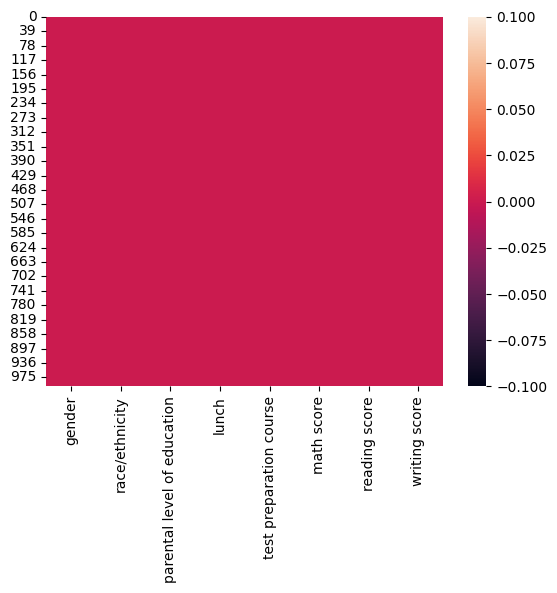

In [163]:
# using graph we can show missing values esme koi bhi null value nhi hai toh pura pink dikh rha hai 
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show()

yadi apke averall data set mein 50% data null hai toh uss pr analysis karna ahi nhi hai 
same yadi kisi column mein null values 50% se jyada hai toh remove kar de yadi importantt data hai toh fill karo 

In [164]:
#drop mising values

# columns ko delete karne ke liye 
# data.dropna(column = ["column name"]axis=1,inplace=True)

# rows ko delete karne ke liye
data.dropna(inplace=True)

In [165]:
# data lose kitne percent kiya hai 
(1000 - data.shape[0])/1000 * 100

0.0

Categorical data ko fill karna hai toh 

In [166]:
# data.fillna(10,inplace=True)  this is not good
# backward filling 
# forward filling

#data .fillna(method='bfill',axis = 1,inplace=True)  # backword filling , axis =1 means column wise
#data .fillna(method='ffill',inplace=True)  # forward filling # axis =0 means row wise

In [167]:
#data['marks'].fillna(data['marks'].mean(),inplace=True)  # numerical data ko fill karne ke liye mean use karte hai

#data['marks'].fillna(data['marks'].mode()[0],inplace=True)  # categorical data ko fill karne ke liye mode use karte hai

In [168]:
#object type ke data set mein mode fill karna hai 

data.select_dtypes(include=['object']).columns

data.select_dtypes(include=['object']).isnull().sum()

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0],inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5952\3868942719.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0],inplace=True)


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [170]:
data.select_dtypes(include="int").columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [171]:
'''# eski help se hum multiple columns ke missing values ko ek sath fill kar sakte hai
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
arr = si.fit_transform(data[['marks','age']])
 
  # mean,median,most_frequent,constent
df = pd.DataFrame(arr,columns=['marks','age'])'''

"# eski help se hum multiple columns ke missing values ko ek sath fill kar sakte hai\nfrom sklearn.impute import SimpleImputer\n\nsi = SimpleImputer(strategy='mean')\narr = si.fit_transform(data[['marks','age']])\n\n  # mean,median,most_frequent,constent\ndf = pd.DataFrame(arr,columns=['marks','age'])"

In [172]:
df.isnull().sum()

name        0
en_name     0
dtype: int64

# Onehot Encoding

ye uss data pr use hoti hai jisme gata km ho yes or  no esme data 0 and 1 ke form mein ho jata hai 

In [173]:
# eska mtlb ye hai ki enn do columns pr hame one hot encoding perform karna hai toh enko dusre variable ke andar store kar liya hai 
#en = data[['gender','Married']]  # object type ke columns ka data le liya

In [174]:
#pd.get_dummies(en)

In [175]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')  # drop first se ek column drop ho jata hai jisse multicollinearity nhi hoti
arr = ohe.fit_transform(en).toarray()

pd.DataFrame(arr,columns = ["age","gender_female"])

NameError: name 'en' is not defined

# Label Encoding

ye nominal data pr perform hota hai mtlb jisme koi connected nhi hai aur na squence pattern ho

In [176]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [177]:
df = pd.DataFrame({'name':['wscube','youtube','google','amazon'],})
print(df)

      name
0   wscube
1  youtube
2   google
3   amazon


# ye fit transform kb se karna hai  
fit jo hai bo model ko train karta hai uske baad hame esko transform karna padta hai. eska use tb kiya jata hai jb model building karne ja rhe hai ya deploya karne ja rhe ho enka use ek sath bhi kar sakte hai 

In [178]:
le = LabelEncoder()
df['en_name '] = le.fit_transform(df['name'])

df

,name,en_name
0,wscube,2
1,youtube,3
2,google,1
3,amazon,0


In [179]:
data['lunch'].unique()  # ye hame unique values de deta hai kisi bhi column ki

array(['standard', 'free/reduced'], dtype=object)

In [180]:
la = LabelEncoder()
la.fit(data['lunch'])


LabelEncoder()

In [181]:
data['lunch'] = la.transform(data['lunch'])

# Ordinary Encoding
using sklearn and map functon

In [182]:
ds = pd.DataFrame({'Size':['l','s','m','xl','xxl','s','m','l','s','m','l','l','xxl']}) 
ds

,Size
0,l
1,s
2,m
3,xl
4,xxl
5,s
6,m
7,l
8,s
9,m


In [183]:
or_data = [['s','m','l','xl','xxl']]  # ye hame size ke according value de deta hai

In [184]:
from sklearn.preprocessing import OrdinalEncoder

In [185]:
oe = OrdinalEncoder(categories=or_data)
oe.fit(ds[['Size']])

,categories,"[['s', 'm', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [186]:
ds['Size_en']=oe.transform(ds[['Size']])

In [ ]:
ds

,Size,Size_en
0,l,2.0
1,s,0.0
2,m,1.0
3,xl,3.0
4,xxl,4.0
5,s,0.0
6,m,1.0
7,l,2.0
8,s,0.0
9,m,1.0


In [ ]:
ord1 = {'s':1,'m':2,'l':3,'xl':4,'xxl':5}
ds['Size_map'] = ds['Size'].map(ord1)

In [ ]:
ds

,Size,Size_en,Size_map
0,l,2.0,3
1,s,0.0,1
2,m,1.0,2
3,xl,3.0,4
4,xxl,4.0,5
5,s,0.0,1
6,m,1.0,2
7,l,2.0,3
8,s,0.0,1
9,m,1.0,2


# Outlier  
outlier ka mtlb hota hai ki bo data jo range se bahar chla jaye out of range jaise ek class ke students mein kuch students bilkul dumb hote hai aur kuch bhut jyada intelligent toh bo class ke andar outlier ki tarah work karenge 

In [187]:
sns.boxplot(x = 'marks',data=data)
plt.show()

ValueError: Could not interpret value `marks` for `x`. An entry with this name does not appear in `data`.

In [189]:
sns.distplot(data['Marks'])
plt.show()

KeyError: 'Marks'

# Outlier handling

Outlier detection using IQR and Z^2 method

IQR - intire quantile range

In [ ]:
q1 = data["math marks"].quantile(0.25)
q3 = data["math marks"].quantile(0.75) 

In [ ]:
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [ ]:
new_data=data[data['math marks'] < lower_bound | data['math marks'] > upper_bound]